<a href="https://colab.research.google.com/github/SURESHBEEKHANI/Autoencoder/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Autoencoder

An autoencoder is a type of artificial neural network used primarily for learning efficient representations of input data, typically for the purpose of dimensionality reduction or anomaly detection. Here’s a detailed breakdown:

## Components of an Autoencoder

**Encoder:** This part of the network compresses the input data into a lower-dimensional representation. It typically consists of one or more layers of neurons that progressively reduce the dimensionality of the input.

# Bottleneck (Latent Space):

This is the layer in the middle of the network where the data is at its most compressed form. The size of this layer determines the dimension of the encoding. The bottleneck captures the most important features of the input data.

**Decoder:** This part of the network reconstructs the input data from the lower-dimensional representation created by the encoder. It typically consists of one or more layers of neurons that progressively increase the dimensionality back to the original input size.

## Working of an Autoencoder

**Input Data:** The raw data you want to compress or analyze (e.g., images, time series data).

**Encoding:** The encoder processes the input data and transforms it into a lower-dimensional representation.

**Latent Space Representation:** The compressed data at the bottleneck layer.

**Decoding:** The decoder processes the compressed data and attempts to reconstruct the original input data.

Output: The reconstructed data, which is compared to the original input to calculate the reconstruction error.
Training an Autoencoder
Autoencoders are trained using unsupervised learning. The training process involves minimizing the reconstruction error, which is the difference between the input data and the reconstructed output. This error is typically measured using mean squared error (MSE) or other suitable loss functions.

## Applications of Autoencoders

**Dimensionality Reduction:** Reducing the number of features in a dataset while preserving important information.

**Anomaly Detection:** Identifying unusual patterns or outliers in data by measuring the reconstruction error. High reconstruction error indicates a potential anomaly.

**Denoising:** Removing noise from data, such as images or signals, by training the autoencoder to reconstruct clean data from noisy inputs.

**Data Compression:** Compressing data to save storage space or transmission bandwidth, and then reconstructing it when needed.

**Feature Learning:** Learning useful features from raw data that can be used for other machine learning tasks.

## Types of Autoencoders

**Vanilla Autoencoder:** The basic form with simple feedforward neural networks.

**Convolutional Autoencoder (CAE):** Uses convolutional layers, particularly useful for image data.

**Variational Autoencoder (VAE):** Introduces a probabilistic approach to learning latent representations, useful for generating new data samples.

**Denoising Autoencoder:** Trained to reconstruct the input from a corrupted version of it, useful for noise removal.

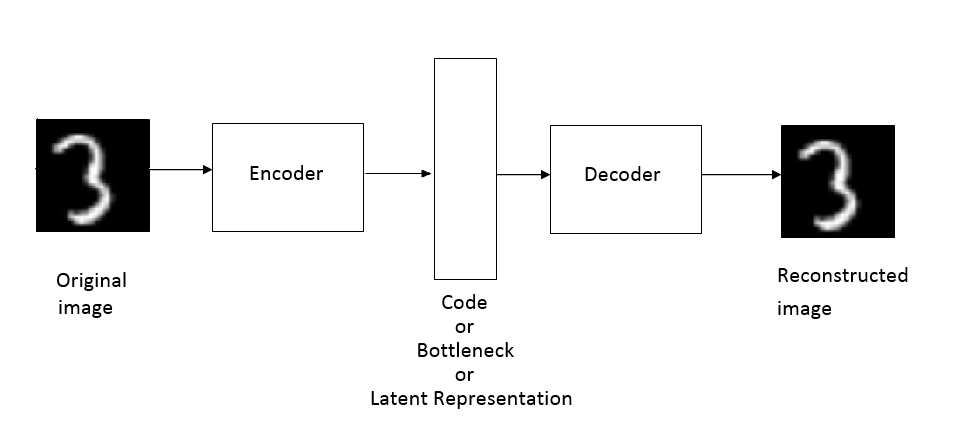

In [ ]:
import tensorflow as tf #import tensorflow  library  use tarin model and imoport dataset
from tensorflow.keras.datasets import mnist #import mnist dataset
import numpy as np # import numpy for numerical  optriaction
import matplotlib.pyplot as plt # import  for Visualization

# Load Dataset

In [ ]:
#load dataset withou traget varible
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# Feature scaling

This technique scales the pixel values to a range of [0, 1] or [-1, 1]. This is typically done by dividing the pixel values by 255, as the pixel values range from 0 to 255.

In [ ]:
#convert  pixle value into 0,1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Reshaping image sizes

In [ ]:
#reshape the image size into 786 pixels
x_train = x_train.reshape((len(x_train), 28*28*1))
x_test = x_test.reshape((len(x_test), 28*28*1))

In [ ]:
print(x_train.shape)
print(x_test.shape)

# Convolutional Autoencoder

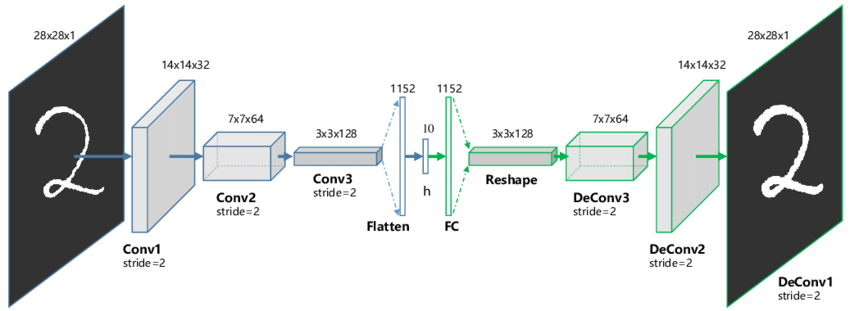


A Convolutional Autoencoder (CAE) is a type of neural network designed to learn efficient codings of input data, typically for the purpose of image compression and reconstruction. It consists of two main parts: the encoder and the decoder. The encoder compresses the input into a latent-space representation, while the decoder reconstructs the input from this representation.

Encoder:

Uses convolutional layers to capture spatial hierarchies in images.
Reduces the dimensionality of the input data, creating a compressed representation.

Decoder:

Uses deconvolutional (or transposed convolutional) layers to reconstruct the original input from the compressed representation.
Attempts to produce an output as close as possible to the original input.

In [ ]:
# Import necessary layers from TensorFlow Keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

# Import the Model class from TensorFlow Keras
from tensorflow.keras.models import Model

# Example usage:
# These are some of the layers typically used in training an autoencoder:
# - Input: Defines the input layer shape for the autoencoder.
# - Conv2D: Creates a 2D convolutional layer, which is essential for feature extraction.
# - MaxPooling2D: Downsamples the input representation, reducing its dimensionality.
# - UpSampling2D: Upsamples the input representation, used in the decoder part of an autoencoder.
# - Flatten: Flattens the input, converting it into a 1D array, often used before a Dense layer in a classifier.
# - Reshape: Reshapes the input tensor to a specified shape.


## Architecture of Convolutional  Auto-encoder

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

# Define input layer
input_layer_cnv = Input(shape=(28, 28, 1))

# Encoder layers
ae_cnv_en = Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D((2, 2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D(32, (3, 3), activation="relu", padding="same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D(4, (3, 3), activation="relu", padding="same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2, 2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name="bot")(ae_cnv_en)

# Decoder layers
ae_cnv_de = Reshape((4, 4, 4), input_shape=(64,), name="botnext0")(ae_cnv_en)
ae_cnv_de = Conv2D(4, (3, 3), activation="relu", padding="same", name="botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name="botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation="relu", padding="same", name="botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name="botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3, 3), activation="relu", padding="valid", name="botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2, 2), name="botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D(1, (3, 3), activation="sigmoid", padding="same", name="botnext7")(ae_cnv_de)

# Define the Autoencoder model
Ae_Conv = Model(inputs=input_layer_cnv, outputs=ae_cnv_de)

# Compile the model
# Use SGD optimizer with a learning rate of 0.09 and clipvalue of 2.5
Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=["accuracy"])

# Alternatively, you can use Adadelta optimizer with a learning rate of 0.1 and clipvalue of 2
# Ae_Conv.compile(optimizer=tf.keras.optimizers.Adadelta(0.1, clipvalue=2), loss='binary_crossentropy', metrics=["accuracy"])

# Print model summary
Ae_Conv.summary()


## Encoder Summary

In [ ]:
ae_conv_encoder = Model (inputs = input_layer_cnv, outputs = Ae_Conv.get_layer("botnext0").output, name = "Conv_AE_encoder")
ae_conv_encoder.summary()

## decoder Summary

In [ ]:

encode_inp_cnv = Input(shape = (64,))
tmp_dec = Ae_Conv.get_layer("botnext0")(encode_inp_cnv)
for i in range(1,8):
  st = "botnext{}".format(i)
  tmp_dec = Ae_Conv.get_layer(st)(tmp_dec)

ae_conv_decoder = Model(inputs = encode_inp_cnv, outputs = tmp_dec, name= "Conv_AE_decoder")
ae_conv_decoder.summary()


Reshape data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)

In [ ]:
from time import time
tic = time()
Ae_Conv.fit(x_train, x_train,
                epochs=100,
                verbose=2,
                batch_size=100,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

In [ ]:
x_test.shape

In [ ]:
encoded_imgs = ae_conv_encoder.predict(x_test)
#encoded_imgs = ae_conv_encoder.predict(x_train[0:100])
print (encoded_imgs.shape)